In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import time

In [43]:
# Definir URL do site em que se deseja realizar web scraping
url = 'https://coinmarketcap.com/pt-br/currencies/terra-luna/'

In [44]:
# Realizando request para entendimento se web scraping funcionará no site:
html = requests.get(url)

# Imprimindo prévia:
html

<Response [200]>

'<!DOCTYPE html><html lang="pt-br" dir="ltr"><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write(\'<scr\'+\'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc\'+\'ript><scr\'+\'ipt type="text/javascript"> function OptanonWrapper() {} </sc\'+\'ript>\');}\n})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1695951583702;return;}window.__renderTime__ = {"pageInitStart":1695951583684,"pageInitEnd":1695951583700,"pageRender":1695951583702};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOU
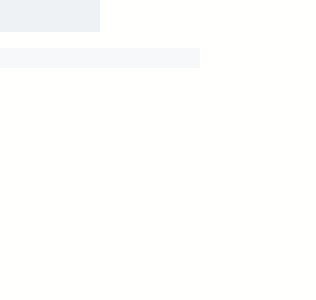

In [45]:
# Prévia do HTML
html.text

<!DOCTYPE html>
<html dir="ltr" lang="pt-br"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1695951583702;return;}window.__renderTime__ = {"pageInitStart":1695951583684,"pageInitEnd":1695951583700,"pageRender":1695951583702};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE_ERROR__
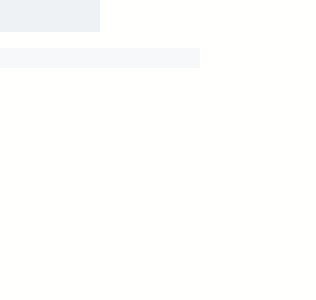

In [46]:
# Definindo a 'sopa' de letras da url (html):
soup = BeautifulSoup(html.text, 'html.parser')

# Imprimindo prévia:
soup

In [47]:
# Buscar através da classe inspecionada na URL, o valor buscado:
valor_inicial = soup.find('div',attrs={'class':'sc-16891c57-0 hqcKQB flexStart alignBaseline'}).text

# Imprimindo prévia
valor_inicial

'R$0.0003181\xa0\xa03.50%\xa0(1d)'

In [48]:
# Extrair apenas a parte do valor que você precisa (0.0003)
parte_valor = valor_inicial.split('R$')[1].split()[0]

# Formatar a parte do valor para ter um dígito antes do ponto e quatro casas decimais
valor_formatado = f"0.{parte_valor[2:6]}"

# Converter a string formatada de volta para um número decimal
valor_decimal = float(valor_formatado)

print(valor_decimal)

0.0003


In [49]:
#Extraindo o tempo em que o web scraping foi executado:
hora_agora = time.strftime('%d-%m-%Y %H:%M:%S')
hora_agora

'28-09-2023 22:41:21'

In [50]:
#Criando dicionário para inserção de variáveis
dicionario =  {
    'Moeda':['Luna'],
    'Preco_Agora':[valor_decimal],
    'Data_Captura':[hora_agora]
}

In [51]:
# Imprimindo dicionário para prévia
dicionario

{'Moeda': ['Luna'],
 'Preco_Agora': [0.0003],
 'Data_Captura': ['28-09-2023 22:41:21']}

In [52]:
# Criando dataframe df com dados do dicionário já estruturados
df = pd.DataFrame(dicionario)
df.head()

,Moeda,Preco_Agora,Data_Captura
0,Luna,0.0003,28-09-2023 22:41:21


In [53]:
# Criando um dataframe incremental (substituir por insert no banco):
df_agora = pd.DataFrame()

# Comentar esta primeira linha de código após criação para não recriação e exclusão de registros
df_agora = pd.concat([df_agora, df])

# Imprimindo prévia
df_agora

,Moeda,Preco_Agora,Data_Captura
0,Luna,0.0003,28-09-2023 22:41:21
